In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image_dataset_from_directory as idfd
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB3, MobileNetV2, InceptionV3
from tensorflow.keras.optimizers import Adam
import shutil
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
tf.config.experimental_run_functions_eagerly(True)

Init Plugin
Init Graph Optimizer
Init Kernel
Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [2]:
train_path=r"/Users/adityavs14/Documents/Internship/Pianalytix/Month_2/ASL/ML_model/data/Train_Alphabet"
test_path=r"/Users/adityavs14/Documents/Internship/Pianalytix/Month_2/ASL/ML_model/data/Test_Alphabet"

In [10]:
BATCH_SIZE = 64
IMAGE_SIZE = 128
input_shape = (128,128,3)

In [11]:
data_gen = ImageDataGenerator(rescale=1./255,
                              validation_split = 0.2)

In [12]:
train_gen = data_gen.flow_from_directory(train_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size = BATCH_SIZE,
                                        color_mode= "rgb",
                                        shuffle=True,
                                        class_mode = "categorical",
                                        subset = "training")

Found 19440 images belonging to 27 classes.


In [13]:
val_gen = data_gen.flow_from_directory(train_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size = BATCH_SIZE,
                                        color_mode= "rgb",
                                        shuffle=False,
                                        class_mode = "categorical",
                                        subset = "validation")

Found 4860 images belonging to 27 classes.


In [14]:
test_gen = data_gen.flow_from_directory(test_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size = BATCH_SIZE,
                                        color_mode= "rgb",
                                        shuffle=False,
                                        class_mode = "categorical")

Found 2700 images belonging to 27 classes.


In [15]:
labels = train_gen.class_indices
classes = list(labels.keys())

print(classes)

['A', 'B', 'Blank', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [23]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(128,128,3)))
model.add(Conv2D(16,(3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
#model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(27, activation='softmax'))
#model.add(Dense(1, activation='sigmoid'))

In [24]:
with tf.device("/device:GPU:0"):
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [25]:
with tf.device("/device:GPU:0"):
    history = model.fit(
      train_gen,
      validation_data=val_gen,
      epochs=5,
      verbose=1,
    )

Epoch 1/5
304/304 [==============================] - 131s 430ms/step - loss: 1.4214 - accuracy: 0.5837 - val_loss: 0.3729 - val_accuracy: 0.9039
Epoch 2/5
304/304 [==============================] - 130s 429ms/step - loss: 0.2879 - accuracy: 0.9150 - val_loss: 0.2092 - val_accuracy: 0.9428
Epoch 3/5
304/304 [==============================] - 130s 429ms/step - loss: 0.1317 - accuracy: 0.9619 - val_loss: 0.1471 - val_accuracy: 0.9623
Epoch 4/5
304/304 [==============================] - 130s 429ms/step - loss: 0.0682 - accuracy: 0.9801 - val_loss: 0.1320 - val_accuracy: 0.9663
Epoch 5/5
304/304 [==============================] - 131s 430ms/step - loss: 0.0447 - accuracy: 0.9866 - val_loss: 0.1242 - val_accuracy: 0.9724


In [26]:
def plot_hist(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.grid()
    plt.show()



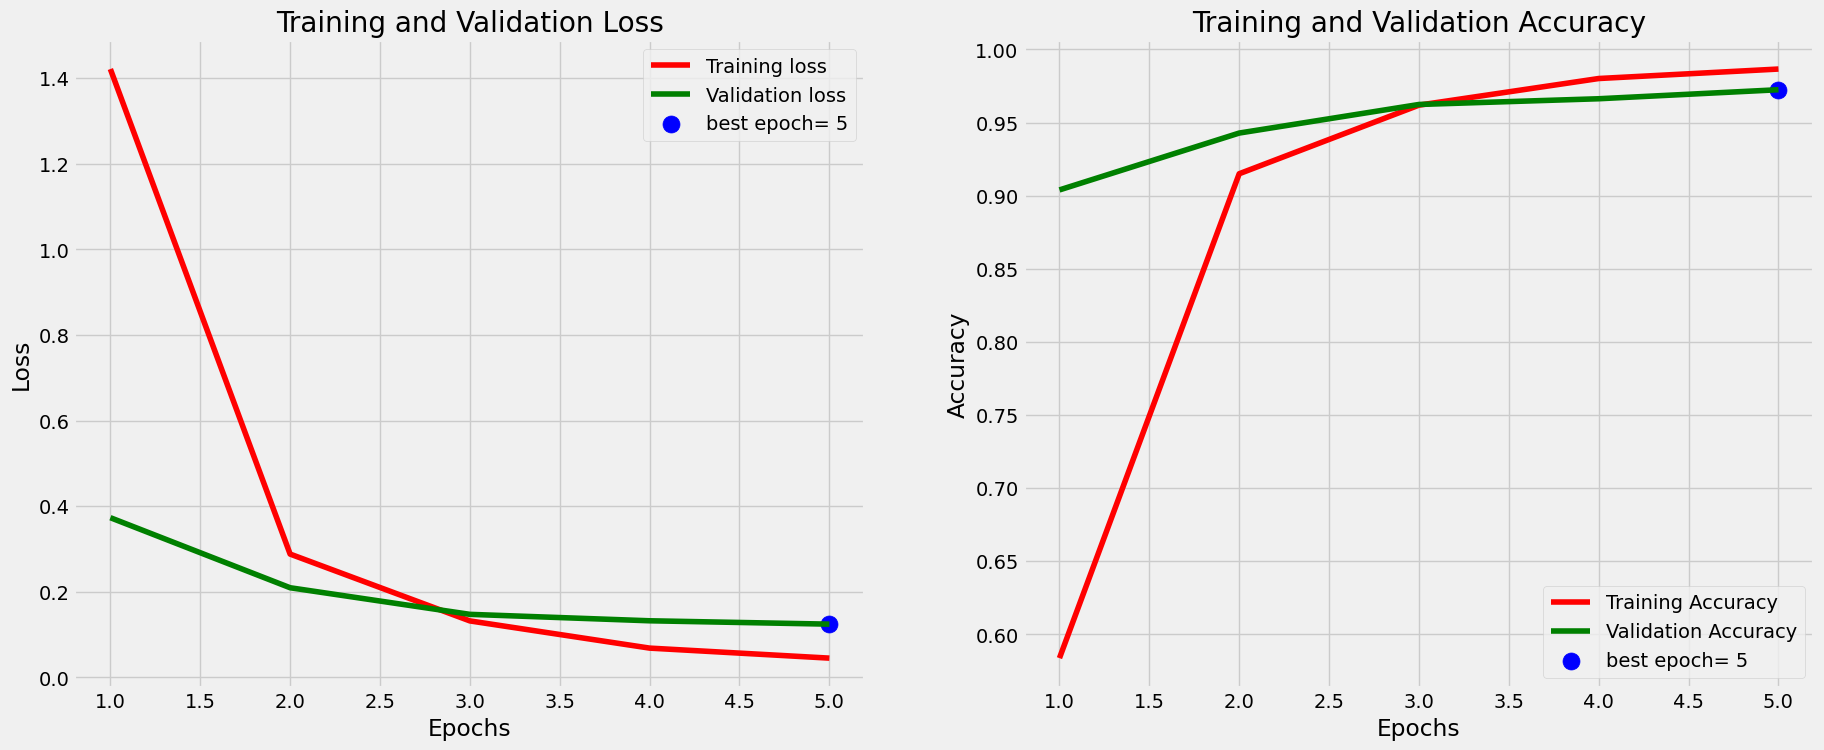

In [27]:
def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout    
    plt.show()
    
tr_plot(history,0)

In [28]:
y_pred = model.predict(test_gen,verbose=1)
y_test = test_gen.classes

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py:3703: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  warnings.warn(


43/43 [==============================] - 14s 334ms/step


43/43 [==============================] - 14s 327ms/step
there were 62 errors in 2700 tests for an accuracy of  97.70


2023-05-18 18:40:09.502587: W tensorflow/core/framework/op_kernel.cc:1755] Invalid argument: ValueError: callback pyfunc_2 is not found
Traceback (most recent call last):

  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/ops/script_ops.py", line 238, in __call__
    raise ValueError("callback %s is not found" % token)

ValueError: callback pyfunc_2 is not found


2023-05-18 18:40:09.502634: W tensorflow/core/kernels/data/generator_dataset_op.cc:107] Error occurred when finalizing GeneratorDataset iterator: Invalid argument: ValueError: callback pyfunc_2 is not found
Traceback (most recent call last):

  File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/ops/script_ops.py", line 238, in __call__
    raise ValueError("callback %s is not found" % token)

ValueError: callback pyfunc_2 is not found


	 [[{{node PyFunc}}]]
2023-05-18 18:40:09.508123: W tensorflow/core/framework/o

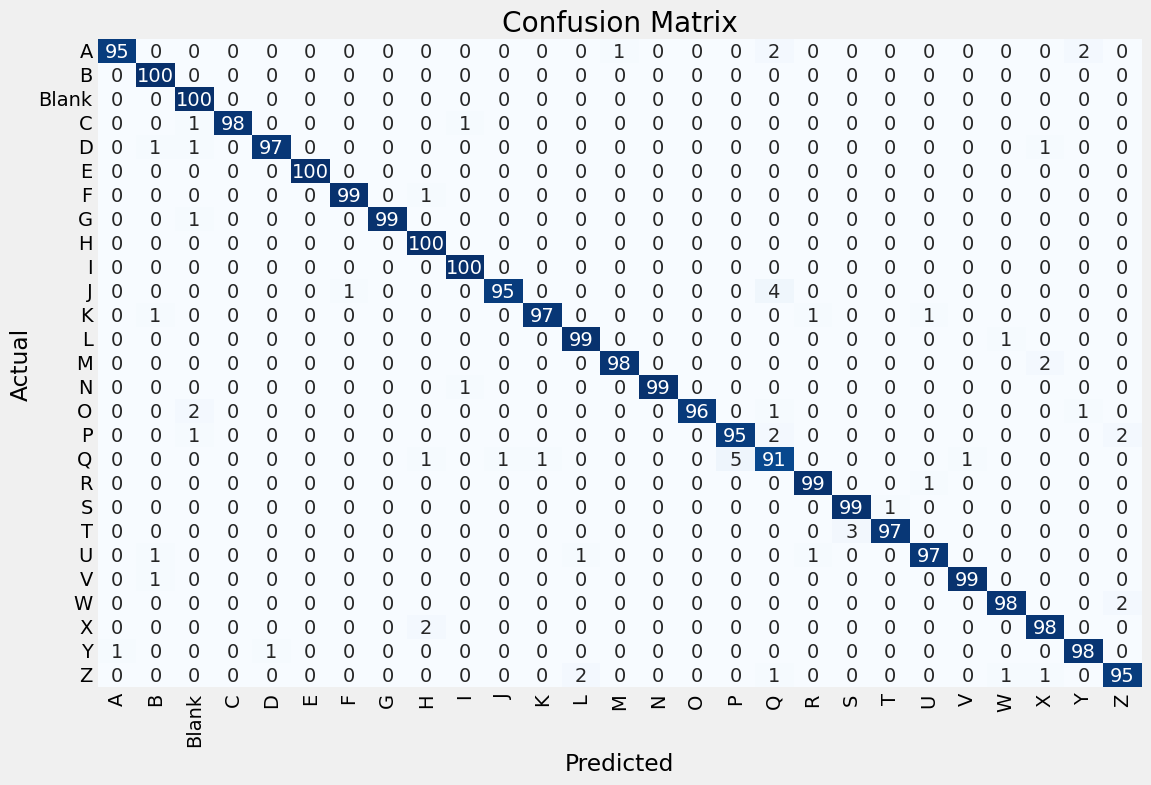

Classification Report:
----------------------
               precision    recall  f1-score   support

           A     0.9896    0.9500    0.9694       100
           B     0.9615    1.0000    0.9804       100
       Blank     0.9434    1.0000    0.9709       100
           C     1.0000    0.9800    0.9899       100
           D     0.9898    0.9700    0.9798       100
           E     1.0000    1.0000    1.0000       100
           F     0.9900    0.9900    0.9900       100
           G     1.0000    0.9900    0.9950       100
           H     0.9615    1.0000    0.9804       100
           I     0.9804    1.0000    0.9901       100
           J     0.9896    0.9500    0.9694       100
           K     0.9898    0.9700    0.9798       100
           L     0.9706    0.9900    0.9802       100
           M     0.9899    0.9800    0.9849       100
           N     1.0000    0.9900    0.9950       100
           O     1.0000    0.9600    0.9796       100
           P     0.9500    0.9500 

In [29]:
from sklearn.metrics import confusion_matrix
def predictor(test_gen, test_steps):
    y_pred= []
    y_true=test_gen.labels
    classes=list(train_gen.class_indices.keys())
    class_count=len(classes)
    errors=0
    preds=model.predict(test_gen, verbose=1)
    tests=len(preds)
    for i, p in enumerate(preds):
            pred_index=np.argmax(p)         
            true_index=test_gen.labels[i]  # labels are integer values
            if pred_index != true_index: # a misclassification has occurred                                           
                errors=errors + 1
            y_pred.append(pred_index)
    acc=( 1-errors/tests) * 100
    print(f'there were {errors} errors in {tests} tests for an accuracy of {acc:6.2f}')
    ypred=np.array(y_pred)
    ytrue=np.array(y_true)
    if class_count <=30:
        cm = confusion_matrix(ytrue, ypred )
        # plot the confusion matrix
        plt.figure(figsize=(12, 8))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(class_count)+.5, classes, rotation=90)
        plt.yticks(np.arange(class_count)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
    clr = classification_report(y_true, y_pred, target_names=classes, digits= 4) # create classification report
    print("Classification Report:\n----------------------\n", clr)
    return errors, tests
errors, tests=predictor(test_gen, 36)

In [30]:
model.save('ASl.h5')

In [18]:
test_path = "/Users/adityavs14/Documents/Internship/Pianalytix/Month_2/ASL/ML_model/data/Test_Alphabet/Z/dbfca0d7-a6b5-4c9b-b4c7-eda66108ebac.rgb_0000.png"

In [6]:
import cv2
import matplotlib.pyplot as plt

In [7]:
model = keras.models.load_model('ASL.h5')

In [16]:
def pipeline(path):
    img = cv2.imread(path)
    img = cv2.resize(img, (128,128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    data = (np.array(img).reshape(-1,128,128,3))
    pred = model.predict(data)
    return pred[0]

Z


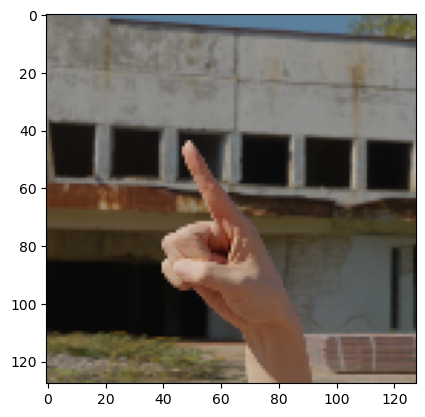

In [21]:
out = pipeline(test_path)
#print(out)
class_names = ['A', 'B', 'Blank', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
print(class_names[np.argmax(out)])